# Machine Learning Strategy
*Author -- Morgan Gautherot*

If you have any question please feel free to send me an email at :

gautherotmorgan0@gmail.com

## 1 Feature scaling

Feature scaling is very important step before modeling, it avoid gradient descent to diverge, and even helps it to converge quickly.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(123)

Let's import 'multivariate_regression.txt'

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

We take again our data set with two features, square meters and number of rooms in order to predict the price of houses.

In [3]:
# upload the dataset
multivariate_regression = np.genfromtxt('multivariate_regression.txt', delimiter=',')

m, _ = multivariate_regression.shape

#X = np.stack(multivariate_regression[:, :2], axis=1)
X = multivariate_regression[:, :2] 
Y = multivariate_regression[:, 2].reshape((1, m))

OSError: multivariate_regression.txt not found.

We will use function implemented in the previous exercice.

In [0]:
def predict(X, W):
  """ Predict our h(x) in function of their features 
  INPUT :
    X shape(n, m)
    W shape(n, 1)
  OUTPUT :
    h shape(1, m)"""

  return np.dot(W.T, X)

In [0]:
def ComputeCost(X, W, Y):
  """ Compute cost for linear regression 
  INPUT :
    X shape(n, m)
    W shape(n, 1)
    Y shape(1, m)
  OUTPUT :
    J float"""

  _, m = X.shape

  return 1/(2*m) * np.dot((predict(X, W)-Y), (predict(X, W)-Y).T)

We change a bit 'gradientDescent' in order to output w history.

In [0]:
def gradientDescent(X, W, Y, alpha, num_iters):
  """ gradientDescent compute gradient descent to learn best W
  INPUT :
    X           shape(n, m)
    W           shape(n, 1)
    Y           shape(1, m)
    alpha       float
    num_iters   integer
  OUTPUT :
    W           shape(n, 1)
    J_history   shape(num_iters,)
    W_history.  len(num_iters)"""
  
  _, m = X.shape
  J_history = np.zeros(num_iters)
  W_history = []
  
  for it in range(0, num_iters):

    gradient = (alpha/m) * np.dot(X, (predict(X, W)-Y).T)
    W = W - gradient
    
    J_history[it] = ComputeCost(X, W, Y)
    W_history.append(W)
    
  return W, J_history, W_history

In [0]:
def lr_fit(X, W, Y, alpha, num_iters) :
  """ lr_fit train our algorithm to find the best W for our prediction
  INPUT :
    X          shape(m, n-1)
    W          shape(n, 1)
    Y          shape(1, m)
    alpha      float
    num_iters  integer
  OUPUT :
    W          shape(n, 1)
    J_history  shape(num_iters,)
    W_history  len(num_iters)"""
  
  m, _ = X.shape
  
  X_1 = np.stack(np.hstack((np.ones(m).reshape(m, 1), X)), axis=1)
  
  W, J_history, W_history = gradientDescent(X_1, W, Y, alpha, num_iters)
  
  return W, J_history, W_history

In [8]:
alpha = 0.01
num_iters = 200
W = np.array([0, 0, 0]).reshape(3, 1)
W, J_history, W_history = lr_fit(X, W, Y, alpha, num_iters)
print(W)

[[nan]
 [nan]
 [nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


We obtain 'nan' value which in python mean 'Not A Number'.

But why do we get 'nan' value.

Take a look at J_history.

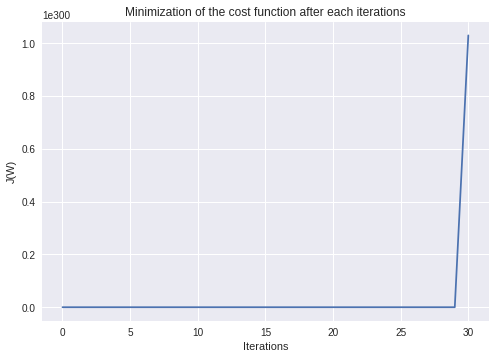

In [9]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("J(W)")
plt.title("Minimization of the cost function after each iterations")
plt.show()

In [10]:
print(J_history[:76])

[1.34926868e+020 2.88086682e+029 6.15103114e+038 1.31332638e+048
 2.80412528e+057 5.98717780e+066 1.27834153e+076 2.72942800e+085
 5.82768926e+094 1.24428862e+104 2.65672054e+113 5.67244922e+122
 1.21114282e+132 2.58594988e+141 5.52134452e+150 1.17887997e+160
 2.51706444e+169 5.37426500e+178 1.14747656e+188 2.45001399e+197
 5.23110344e+206 1.11690967e+216 2.38474966e+225 5.09175547e+234
 1.08715704e+244 2.32122386e+253 4.95611949e+262 1.05819697e+272
 2.25939028e+281 4.82409664e+290 1.03000834e+300             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf         

As you can see, number become too great and computer can not support them anymore.

In [11]:
for w in W_history[:10]:
  print('w0: '+str(np.squeeze(w[0]))+', w1: '+str(np.squeeze(w[1]))+', w2:'+str(np.squeeze(w[2])))

w0: 3404.126595744681, w1: 7642091.281914894, w2:11203.677021276595
w0: -152887437.86656326, w1: -353114222127.88116, w2:-510013688.1926549
w0: 7064553437855.206, w1: 1.6316521652734972e+16, w2:23566467308134.695
w0: -3.264352774652003e+17, w1: -7.539454998883625e+20, w2:-1.0889472862547877e+18
w0: 1.5083754594745128e+22, w1: 3.4837928628411908e+25, w2:5.0317520091657106e+22
w0: -6.969824292313177e+26, w1: -1.609773214772199e+30, w2:-2.325046271874287e+27
w0: 3.2205808149810784e+31, w1: 7.438357861737627e+34, w2:1.074345507590473e+32
w0: -1.4881495358876319e+36, w1: -3.4370784139990596e+39, w2:-4.9642808560080104e+36
w0: 6.876365377515248e+40, w1: 1.588187640816008e+44, w2:2.2938695459898213e+41
w0: -3.177395796914108e+45, w1: -7.338616343948817e+48, w2:-1.0599395253093745e+46


Take a look at our data:

$X_1$ is the square meter of our house

$X_2$ is the number of rooms

In [12]:
print(X[:10, :])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


In [13]:
print('x1 mean: '+str(np.mean(X[:, 0])))
print('x1 std: '+str(np.std(X[:, 0])))
print('x2 mean: '+str(np.mean(X[:, 1])))
print('x2 std: '+str(np.std(X[:, 1])))

x1 mean: 2000.6808510638298
x1 std: 786.2026187430467
x2 mean: 3.1702127659574466
x2 std: 0.7528428090618781


$X_1$ is quite large and it is the cause of our problem.

### Standardization from scratch

It's your turn, implement a function which can normalize data:
$$ x'=\frac{x-\bar{x}}{\sigma}$$

Tips : read the documentation for np.mean() and np.std()

In [0]:
def standardization(X):
  """standardization take a data set 
  substract their observations by their mean
  and divide them by their standard deviation
  INPUT:
    X          shape(m, n-1)
  OUPUT:
    X          shape(m, n-1)
    mean_X.    shape(2,)
    std_X.     shape(2,)"""
  
### Your code start here ###
  return (X - np.mean(X, axis=0)) / np.std(X, axis=0), np.mean(X, axis=0), np.std(X, axis=0)
### Your code end here ###

In [15]:
standardize_X, mean_X, std_X = standardization(X)

print('x1 mean: '+str(mean_X[0]))
print('x1 std: '+str(std_X[0]))
print('x2 mean: '+str(mean_X[1]))
print('x2 std: '+str(std_X[1]))

x1 mean: 2000.6808510638298
x1 std: 786.2026187430467
x2 mean: 3.1702127659574466
x2 std: 0.7528428090618782


Expected values : 

x1 mean: 2000

x1 std: 786

x2 mean: 3.1

x2 std: 0.75

Now we can try to train a model with our new data.

In [16]:
alpha = 0.01
num_iters = 200
W = np.array([0, 0, 0]).reshape(3, 1)
W, J_history, W_history = lr_fit(standardize_X, W, Y, alpha, num_iters)
print(W)

[[294804.28212715]
 [ 83217.03697925]
 [ 15220.03137818]]


We have good value for W.

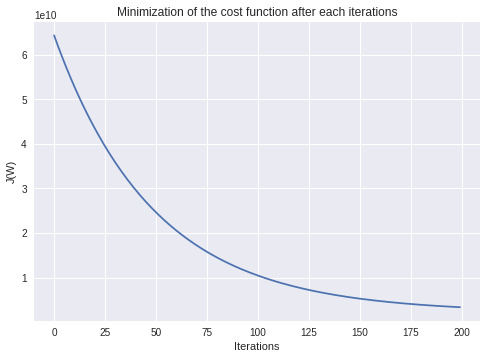

In [17]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("J(W)")
plt.title("Minimization of the cost function after each iterations")
plt.show()

Our train converge to a minimum global.

### Standardization using sklearn

In [18]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Initialize the function
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

# Compute mean and standard deviation
scaler.fit(X)

# see the mean and the std
print('Mean for X1 and X2: '+str(scaler.mean_))
print('\nStandard deviation for X1 and X2: '+str(scaler.var_))

new_X = scaler.transform(X)
print('\nFirst 10 rows of our data set standardize:')
print(new_X[:10, :])

initial_X = scaler.inverse_transform(new_X)
print('\nTransform our standardize data in the initial scale:')
print(initial_X[:10, :])

Mean for X1 and X2: [2000.68085106    3.17021277]

Standard deviation for X1 and X2: [6.18114558e+05 5.66772295e-01]

First 10 rows of our data set standardize:
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]]

Transform our standardize data in the initial scale:
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


## 2 Regression metrics

In this part you will learn more about performance metrics for regression

### Root Mean Square Error (RMSE)

You will implement a function which compute RMSE as a performance metrics:
$$\sqrt{\frac{1}{N}\sum^{N}_{i=1}(y_i-\hat{y}_i)^2}$$

In [0]:
def root_mean_square_error(y_predict, y_true):
  """compute root square error for 
  y_predict with respect to y_true
  INPUT:
    y_predict  shape(1, m)
    y_true.    shape(1, m)
  OUPUT:
    RMSE.      constant"""
  
  _, m = y_true.shape
  
### Your code start here ###
  return np.sqrt(np.mean((y_true-y_predict)**2))
### Your code end here ###

In [20]:
standardize_X_1 = np.stack(np.hstack((np.ones(m).reshape(m, 1), standardize_X)), axis=1)

y_predict = predict(standardize_X_1, W)

RMSE = root_mean_square_error(y_predict, Y)

print('Root Mean Square Error: '+str(RMSE))

Root Mean Square Error: 81789.61591169941


Expected values : 

Root Mean Square Error: 81789.61

### RMSE with sklearn

sklearn doesn't implemented RMSE, if we want to use RMSE we just have to apply np.sqrt to MSE.

In [0]:
from sklearn.metrics import mean_squared_error

def root_mean_square_error_sklearn(y_predict, y_true):
  """compute root square error for 
  y_predict with respect to y_true using sklearn
  INPUT:
    y_predict  shape(1, m)
    y_true.    shape(1, m)
  OUPUT:
    RMSE.      constant"""
  
  return np.sqrt(mean_squared_error(y_predict, Y))

In [22]:
RMSE = root_mean_square_error_sklearn(y_predict, Y)

print('Root Mean Square Error: '+str(RMSE))

Root Mean Square Error: 81789.61591169941


### R-squared

You will implement a function which compute R-squared as a performance metrics:
$$1-\frac{\frac{1}{N}\sum^{N}_{i=1}(y_i-\hat{y}_i)^2}{\frac{1}{N}\sum^{N}_{i=1}(y_i-\bar{y}_i)^2}$$

In [0]:
def R_squared(y_predict, y_true):
  """compute R squared for 
  y_predict with respect to y_true
  INPUT:
    y_predict  shape(1, m)
    y_true     shape(1, m)
  OUPUT:
    R-squared  constant"""
  
  _, m = y_true.shape
  
### Your code start here ###
  return 1 - (np.mean((y_true-y_predict)**2))/(np.mean((y_true-np.mean(y_true))**2))
### Your code end here ###

In [24]:
R2 = R_squared(y_predict, Y)

print('Root Mean Square Error: '+str(R2))

Root Mean Square Error: 0.5628412945669833


Expected values :
R_squared: 0.56

### R-squared with sklearn

In [25]:
from sklearn.metrics import r2_score

R2 = r2_score(np.squeeze(Y), np.squeeze(y_predict))

print('Root Mean Square Error: '+str(R2))

Root Mean Square Error: 0.5628412945669833


## 3 Classification metrics

In this part you will learn more about performance metrics for regression

### Accuracy score from scratch

You have to implement Accuracy score:
$$\frac{1}{N}\sum^{N}_{i=1}[\hat{y}_i=y_i]$$

In [0]:
def accuracy_score(y_predict, y_true):
  """compute accuracy score for 
  y_predict with respect to y_true
  INPUT:
    y_predict  shape(1, m)
    y_true     shape(1, m)
  OUPUT:
    accuracy   constant"""
  
  m = len(y_true)
  
  ### Your code start here ###
  return np.sum(y_predict==y_true)/m
  ### Your code end here ###
  

In [27]:
y_predict = np.zeros(100)
y_true = np.hstack((np.zeros(25),np.ones(25),np.zeros(25),np.ones(25)))

accuracy = accuracy_score(y_predict, y_true)

print("Accuracy score: "+str(accuracy))

Accuracy score: 0.5


Expected values :

Accuracy score: 0.5

Now you want to predict rare events you can have 1% in one class and 99% in the other class. 

In [0]:
y_true = np.hstack((np.zeros(990),np.ones(10)))

Imagine you have a very poor model which predict all your data at 0.

In [0]:
y_predict = np.zeros(1000)

Try to use accuracy score to measure the parformance of your model.

In [30]:
accuracy_score(y_predict, y_true)

0.99

if you just see the performance and not the prediction you can think that your model is very good whereas it has not understand how to predict your data.

Accuracy score can be meaningful when your dataset is balanced.

### Accuracy score from sklearn

In [31]:
from sklearn.metrics import accuracy_score

y_predict = np.zeros(100)
y_true = np.hstack((np.zeros(25),np.ones(25),np.zeros(25),np.ones(25)))

accuracy = accuracy_score(y_predict, y_true)

print("Accuracy score: "+str(accuracy))

Accuracy score: 0.5


### Cross-entropy loss or log loss from scratch

Let's generate two distributions.

In [4]:
x_11 = 1 * np.random.randn(100) + 0
x_21 = 2 * np.random.randn(100) + 2
x_12 = 1 * np.random.randn(100) + 0
x_22 = 2 * np.random.randn(100) + 7

x_1 = np.concatenate((x_11, x_12))
x_2 = np.concatenate((x_21, x_22))
X = np.stack((x_1, x_2), axis=-1)

Y = np.concatenate((np.repeat(0, 100), np.repeat(1, 100)))

Take the previous TP as an example and use sklearn to create a model with X and Y

In [5]:
from sklearn.linear_model import LogisticRegression



log_reg = LogisticRegression(solver='lbfgs', random_state=123)
### Your code start here ###

log_reg.fit(X, Y)

# Do not take the predict but the probability to belong to class 1
y_predict = log_reg.predict_proba(X)[:, 1]
### Your code end here ###

w_0 = np.squeeze(log_reg.intercept_)
w_1, w_2 = np.squeeze(log_reg.coef_)
print("w_0 : "+str(w_0)+"\nw_1 : "+str(w_1)+"\nw_2 : "+str(w_2)+'\ny_predict : shape'+str(y_predict.shape))

w_0 : -6.188504732118498
w_1 : -0.3509611687176448
w_2 : 1.400374187601902
y_predict : shape(200,)


Expected values :

w_0 : -6.18

w_1 : -0.35

w_2 : 1.40

y_predict : shape(200,)

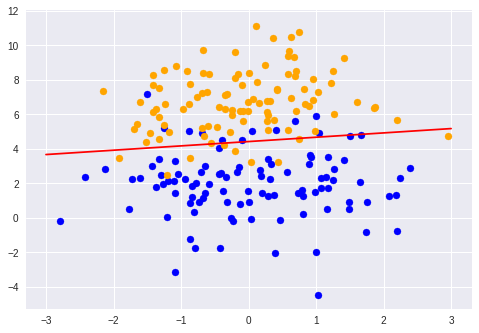

In [34]:
x = np.array(range(-3, 4))
y = (-1/w_2) * (x * w_1 + w_0)

plt.plot(x, y, c='red')

plt.scatter(x_11, x_21, c = 'blue')
plt.scatter(x_12, x_22, c = 'orange')

plt.show()

You have to implement cross-entropy from scratch:
$$ -\frac{1}{N}\sum^{N}_{i=1}y_i \log{(\hat{y}_i)}+(1-y_i)\log{(1-\hat{y}_i)}$$

In [0]:
def log_loss_scratch(y_predict, y_true):
  """compute accuracy score for 
  y_predict with respect to y_true
  INPUT:
    y_predict  shape(1, m)
    y_true     shape(1, m)
  OUPUT:
    log_loss   constant"""
  
  m = len(y_true)
  
  ### Your code start here ###
  return -(1/m)*(np.sum(y_true*np.log(y_predict)+(1-y_true)*np.log(1-y_predict)))
  ### Your code end here ###

In [36]:
log_loss = log_loss_scratch(y_predict, Y)

print("Accuracy score: "+str(log_loss))

Accuracy score: 0.22174346957379598


Expected values :

Accuracy score: 0.22

### Cross entropy log loss from sklean

In [37]:
from sklearn.metrics import log_loss

log_loss = log_loss(Y, y_predict)

print("Accuracy score: "+str(log_loss))

Accuracy score: 0.22174346957379598


### Precision, Recall et $F_1$ score

It's not worth to implement confusion matrix, precision and recall but you will use the sklearn implementation.

Transform soft prediction y_predict into hard prediction y_predict_hard

In [0]:
def threshold(y_predict, thresh):
    """compute accuracy score for 
  y_predict with respect to y_true
  INPUT:
    y_predict      shape(1, m)
    tresh          constant
  OUPUT:
    y_predict_hard shape(1,m)"""
    
### Your code start here ###
    return np.array(y_predict>=thresh)
### Your code end here ###

In [39]:
from sklearn.metrics import confusion_matrix


y_predict_hard = threshold(y_predict, 0.5)


print('Number observation predict belong to class 1: '+str(sum(y_predict_hard)))

Number observation predict belong to class 1: 102


Expected result:

Number observation predict belong to class 1: 102

In [40]:
print(confusion_matrix(Y, y_predict_hard))

[[89 11]
 [ 9 91]]


Complete with numbers above:

TN =

FP = 

FN = 

TP = 

$$ Precision=\frac{TP}{TP+FP}$$

In [41]:
from sklearn.metrics import precision_score

precision = precision_score(Y, y_predict_hard)

print('Preicsion score: '+str(precision))

Preicsion score: 0.8921568627450981


$$ Recall=\frac{TP}{TP+FN}$$


In [42]:
from sklearn.metrics import recall_score

recall = recall_score(Y, y_predict_hard)

print('Recall score: '+str(recall))

Recall score: 0.91


$$ F_1 score=2.\frac{Precision.Recall}{Precision+Recall}$$

In [43]:
from sklearn.metrics import f1_score

f1 = f1_score(Y, y_predict_hard)

print('F1 score: '+str(f1))

F1 score: 0.900990099009901


We plot a curve to help use find the best threshold in function of precision and recall

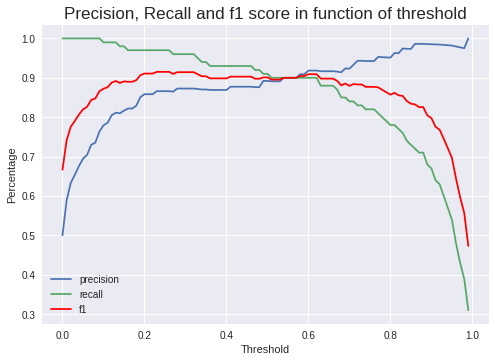

In [44]:
thresh = np.arange(0, 1, 0.01)
recall = np.zeros(100)
precision = np.zeros(100)
f1 = np.zeros(100)

for i in range(0, 100):
  

  recall[i] = recall_score(Y, threshold(y_predict, thresh[i]))
  precision[i] = precision_score(Y, threshold(y_predict, thresh[i]))
  f1[i] = f1_score(Y, threshold(y_predict, thresh[i]))
  
plt.plot(thresh, precision, label='precision')
plt.plot(thresh, recall, label='recall')
plt.plot(thresh, f1, label='f1', color='red')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Percentage')
plt.title('Precision, Recall and f1 score in function of threshold', fontsize=17)
plt.show()

In this example we can take threshold that make the best compromise between precision and recall.

In [45]:
index = np.argmax(f1)

print('Threshold which maximize f1 score is: '+str(thresh[index]))
print('F1 score: '+str(f1[index]))
print('Precision: '+str(precision[index]))
print('Recall: '+str(recall[index]))

Threshold which maximize f1 score is: 0.23
F1 score: 0.9150943396226415
Precision: 0.8660714285714286
Recall: 0.97


We can interpret this precision like, 87% of obversations that our model classified as 1 is really 1.

We can interpret this recall like, 97% of observations that are really 1 are detected. 

### AUC and ROC Curve

It's not worth to implement AUC and ROC Curve we will use sklearn instead.

AUC doesn't need hard prediction to be effective.

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y, y_predict)

0.9703999999999999

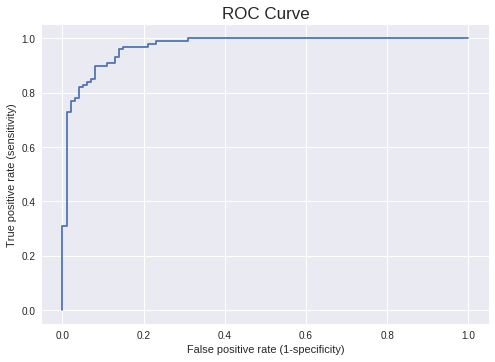

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y, y_predict, pos_label=None, sample_weight=None, drop_intermediate=True)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.title('ROC Curve', fontsize=17)
plt.show()

## 4 Train & Test

We will use sklearn to learn how to split our data into train and test using sklearn.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print('We select randomly our train set containing '+str(X_train.shape[0])+' examples and our test set containing '+str(X_test.shape[0])+' examples')

We select randomly our train set containing 134 examples and our test set containing 66 examples


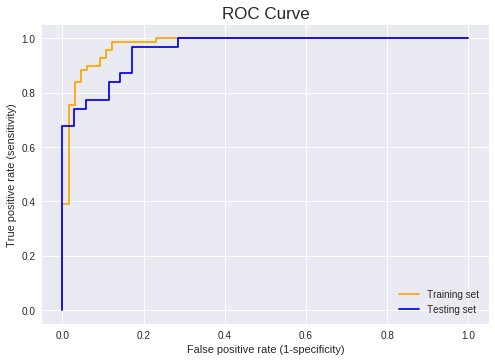

In [49]:
log_reg = LogisticRegression(solver='lbfgs', random_state=123)

log_reg.fit(X_train, y_train)

y_predict_training = log_reg.predict_proba(X_train)[:, 1]
y_predict_testing = log_reg.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_predict_training)
fpr_test, tpr_test, _ = roc_curve(y_test, y_predict_testing)

plt.plot(fpr_train, tpr_train, color='orange', label='Training set')
plt.plot(fpr_test, tpr_test, color='blue', label='Testing set')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.title('ROC Curve', fontsize=17)
plt.legend()
plt.show()

In [50]:
auc_train = roc_auc_score(y_train, y_predict_training)
auc_test = roc_auc_score(y_test, y_predict_testing)


print('AUC for trainning set: '+str(auc_train))
print('AUC for testing set: '+str(auc_test))

AUC for trainning set: 0.9761426978818283
AUC for testing set: 0.9585253456221199


You can see that the model perform less well on the testing than the training set. 

The performance of the model in the testing set is the one you should care the most. 

### Cross validation

To be sure that your model perform well and not just on one set of your set your should use cross validation.

Kfold will iterate your previous split train test radomly K times.

In [51]:
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(solver='lbfgs', random_state=123)

crossval_scores = cross_val_score(log_reg, X, Y, scoring='roc_auc', cv=10)

print(crossval_scores)

[0.94 0.98 0.97 0.98 0.98 0.98 0.98 0.98 0.99 1.  ]


We can see our AUC for the different folder we randomly created. 

In [52]:
auc_mean_CV = np.mean(crossval_scores)
print('Thanks to cross validation we can compute a more stable AUC: '+str(auc_mean_CV))

Thanks to cross validation we can compute a more stable AUC: 0.978


### 5 GridSearch

Grid search is an algorithm that can help you to tune your model. 

This algorithm will test for you to train model with different hyperparameters and will keep the one that give the best performances.

In [53]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='lbfgs', random_state=123)

# Parameter we want to test
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15]}

# Initialize our gridsearch
grid = GridSearchCV(log_reg, parameters, cv=10)

# Test all possiblity and keep the best one
model = grid.fit(X, Y)

# Return the best parameter tested
print('The best tested parameter is : '+str(model.best_params_))

The best tested parameter is : {'C': 0.01}
